# ***DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP***

**GRIP : THE SPARKS FOUNDATION**


**AUTHOR : PRITY KUMARI**

### **## TASK_1 : Prediction Using Supervised ML** 

**Simple Linear Regression**
This is a simple linear regression task as it involves just two variables. Here We have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Getting the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [4]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Let's explore the data**

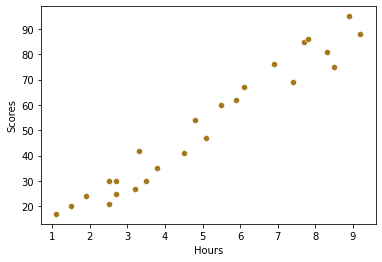

In [8]:
sns.set_palette("Dark2_r")
sns.scatterplot(x='Hours', y='Scores', data = df)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Training and Testing Data**
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Setting variable X and y from dataset 'df'.

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### **Training the Model**
Now its time to train our model on our training data!

So Importing LinearRegression from sklearn.linear_model 

In [12]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
lm.coef_

array([9.94167834])

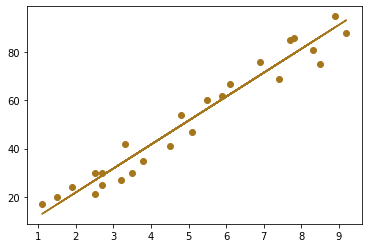

In [13]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**Making Predictions**

In [14]:
print(X_test)                 # Testing data - In Hours
Y_pred = lm.predict(X_test)   # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


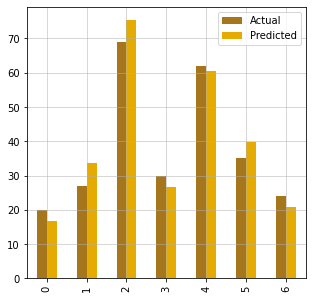

In [16]:
df.plot(kind='bar', figsize=(5,5))
plt.grid(which ='major', linewidth='0.5' )
plt.grid(which ='minor', linewidth='0.5' )
plt.show()

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 4.130879918502482
MSE: 20.33292367497996
RMSE: 4.509204328368805


In [18]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = lm.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
